## 1 Домашнее задание "Машинное обучение и Data Science"
Взять датасет homework.csv
Описание датасета доступно тут - https://www.kaggle.com/c/boston-housing/overview
Предсказываем значение столбца MEDV на основе других признаков
Решить задачу регрессии, используя алгоритм линейной регрессии:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
Оценить качество регрессии при помощи метрики MSE:
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
Шаблон для выполнения домашнего задания:
https://colab.research.google.com/drive/1x4tenHozBvzWG-I_TcKcdCS12V0xhZ8f?usp=sharing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
housing = pd.read_csv('homework.csv')
housing.head(10)

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
5,11,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15.0
6,12,0.11747,12.5,7.87,0,0.524,6.009,82.9,6.2267,5,311,15.2,396.90,13.27,18.9
7,13,0.09378,12.5,7.87,0,0.524,5.889,39.0,5.4509,5,311,15.2,390.50,15.71,21.7
8,14,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,396.90,8.26,20.4
9,15,0.63796,0.0,8.14,0,0.538,6.096,84.5,4.4619,4,307,21.0,380.02,10.26,18.2


In [3]:
housing.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [4]:
# Определяем коэф-ты корреляции для всей таблицы, смотрим на зависимость medv от других параметров
housing.corr()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
ID,1.000000,0.456312,-0.155639,0.421978,0.007958,0.440185,-0.112790,0.257300,-0.356461,0.707526,0.686246,0.309838,-0.271619,0.281953,-0.221694
crim,0.456312,1.000000,-0.210913,0.422228,-0.041195,0.463001,-0.310180,0.379034,-0.397067,0.666636,0.617081,0.313409,-0.475796,0.532077,-0.407454
zn,-0.155639,-0.210913,1.000000,-0.518679,-0.024442,-0.501990,0.328197,-0.544513,0.637142,-0.303663,-0.311180,-0.380449,0.168130,-0.388112,0.344842
indus,0.421978,0.422228,-0.518679,1.000000,0.037496,0.750087,-0.440365,0.638378,-0.702327,0.569779,0.708313,0.391087,-0.335049,0.614155,-0.473932
chas,0.007958,-0.041195,-0.024442,0.037496,1.000000,0.080275,0.112251,0.068286,-0.081834,0.007714,-0.021826,-0.125067,0.062029,-0.050055,0.204390
nox,0.440185,0.463001,-0.501990,0.750087,0.080275,1.000000,-0.338515,0.736000,-0.769364,0.612180,0.670722,0.192513,-0.369416,0.598874,-0.413054
rm,-0.112790,-0.310180,0.328197,-0.440365,0.112251,-0.338515,1.000000,-0.248573,0.269191,-0.272783,-0.356987,-0.366927,0.155202,-0.615747,0.689598
age,0.257300,0.379034,-0.544513,0.638378,0.068286,0.736000,-0.248573,1.000000,-0.764208,0.447380,0.511893,0.259293,-0.268054,0.588834,-0.358888
dis,-0.356461,-0.397067,0.637142,-0.702327,-0.081834,-0.769364,0.269191,-0.764208,1.000000,-0.477610,-0.529539,-0.231101,0.284374,-0.505939,0.249422
rad,0.707526,0.666636,-0.303663,0.569779,0.007714,0.612180,-0.272783,0.447380,-0.477610,1.000000,0.903562,0.470849,-0.406405,0.484568,-0.352251


<AxesSubplot:xlabel='crim', ylabel='medv'>

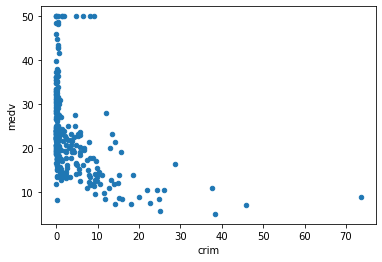

In [5]:
# Визуализация - график зависимости medv (median value of owner-occupied homes in \$1000s) от crim (per capita crime rate by town).
housing.plot(kind='scatter', x='crim', y='medv')

<AxesSubplot:xlabel='indus', ylabel='medv'>

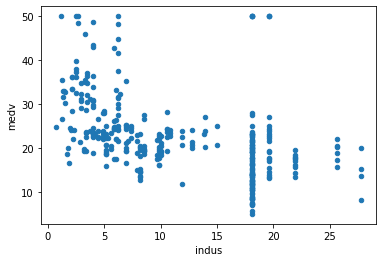

In [6]:
# Визуализация - график зависимости medv (median value of owner-occupied homes in \$1000s) от indus (proportion of non-retail business acres per town).
housing.plot(kind='scatter', x='indus', y='medv')

<AxesSubplot:xlabel='rm', ylabel='medv'>

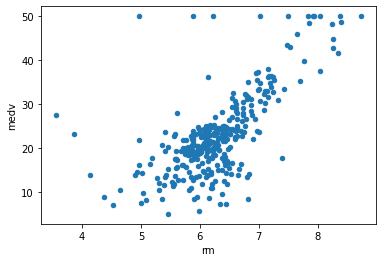

In [7]:
# Визуализация - график зависимости medv (verage number of rooms per dwelling) от rm (average number of rooms per dwelling).
housing.plot(kind='scatter', x='rm', y='medv')

<AxesSubplot:xlabel='tax', ylabel='medv'>

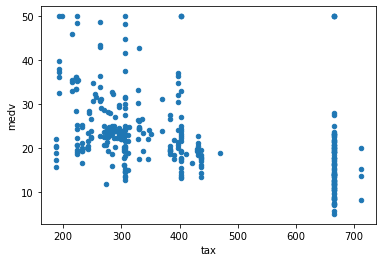

In [8]:
# Визуализация - график зависимости medv (verage number of rooms per dwelling) от tax (full-value property-tax rate per \$10,000).
housing.plot(kind='scatter', x='tax', y='medv')

<AxesSubplot:xlabel='nox', ylabel='medv'>

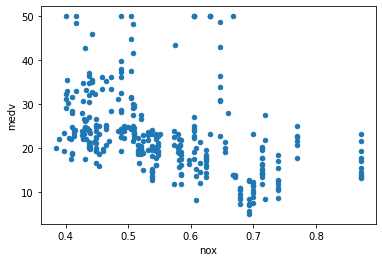

In [9]:
# Визуализация - график зависимости medv (median value of owner-occupied homes in \$1000s) от nox (nitrogen oxides concentration (parts per 10 million).
housing.plot(kind='scatter', x='nox', y='medv')

<AxesSubplot:xlabel='ptratio', ylabel='medv'>

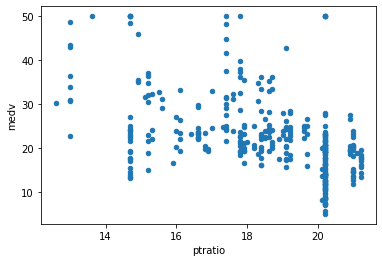

In [10]:
# Визуализация - график зависимости medv (median value of owner-occupied homes in \$1000s) от ptratio (pupil-teacher ratio by town).
housing.plot(kind='scatter', x='ptratio', y='medv')

<AxesSubplot:xlabel='lstat', ylabel='medv'>

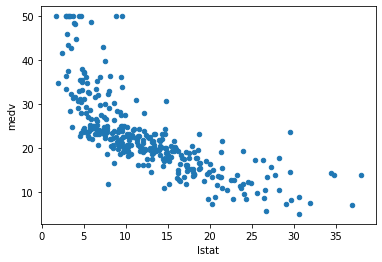

In [11]:
# Визуализация - график зависимости medv (median value of owner-occupied homes in \$1000s) от lstat (lower status of the population (percent)).
housing.plot(kind='scatter', x='lstat', y='medv')

In [12]:
Визуально видна корреляция medv и lstat, rm, crim

SyntaxError: invalid syntax (<ipython-input-12-def74e971cb4>, line 1)

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [14]:
X = housing[['ID', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat']]
y = housing['medv']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [16]:
X_train.shape

(233, 14)

In [17]:
y_train.shape

(233,)

In [18]:
#Строим модель линейной регрессии и определяем коэффициенты
model = LinearRegression()
model.fit(X_train, y_train) # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [19]:
model.coef_

array([-5.61185331e-03, -7.26794079e-02,  6.31545878e-02, -3.06790943e-02,
        4.83220594e+00, -1.59075467e+01,  3.71473516e+00, -1.88659445e-02,
       -1.95186020e+00,  4.46080018e-01, -1.39974924e-02, -7.38758857e-01,
        8.36024306e-03, -5.91570824e-01])

In [20]:
model.intercept_

37.42162316924334

Получили уравнение линейной регрессии: 
medv = -5.61185331e-03*ID - 7.26794079e-02*crim + 6.31545878e-02*zn - 
3.06790943e-02*indus + 4.83220594e+00*chas - 1.59075467e+01*nox + 3.71473516e+00*rm - 1.88659445e-02*age - 
1.95186020e+00*dis + 4.46080018e-01*rad - 1.39974924e-02*tax - 7.38758857e-01*ptratio + 8.36024306e-03*black - 
5.91570824e-01*lstat + 37.42162316924334

In [21]:
model.score(X_test, y_test) # метод возвращает значение коэффициента детерминации
# Коэф-т детерминации высокий - 0,72, зависимость выше средней

0.7247077336757703

In [22]:
y_pred = model.predict(X_test)
y_pred

array([25.3572757 , 22.99195651, 23.19575229, 33.04593648, 25.00094785,
       13.93784403, 17.33108776, 30.40402105, 15.61546767, 24.93563349,
       26.73264537, 19.90563587, 20.11610929, 34.80759143, 21.72339348,
       34.73691434, 22.17638475, 17.46699532, 25.54416138, 16.87229981,
       36.27765068, 31.45469644, 22.9438725 , 28.10762614, 16.9099023 ,
       43.13097101,  7.9609421 , -0.28740559, 31.74445245,  8.68720804,
       18.90854096, 20.50799535, 27.60872404, 15.02832019, 19.4411046 ,
       12.28866924, 27.67513751,  4.53686853, 17.09151328, 22.61695511,
       24.16369378, 21.8636199 , 25.07732976, 39.34302427, 36.38778341,
       21.6029007 , 10.99319165, 21.39445886, 13.93002625, 20.61159022,
       13.34422772, 28.09255404, 21.39952059, 13.63219159, 34.30235638,
        1.37381963, 20.67433794, 27.18064381, 25.32062007, 28.34424623,
       17.91543605, 23.98949165, 18.11567426, 28.31123374, 23.63782384,
       16.61985196, 26.518375  , 20.86973471, 23.87015396, 16.63

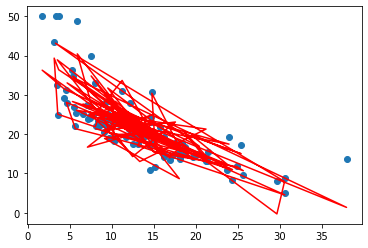

In [23]:
# Строим точечный график и график линейной регрессии
plt.scatter(X_test['lstat'], y_test)
plt.plot(X_test['lstat'], y_pred, c='r')
# Как интерпретировать этот график?

In [24]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

21.09982090035226

In [25]:
# По-моему, средняя квадратичная ошибка имеет большое значение. Это значит, что модель плохо подобралась?